In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [5]:
df = pd.read_stata('../../../HCMST 2017 fresh sample for public sharing draft v1.1.dta')

In [6]:
# banned cols:
# ppethm
# age_when_met
# Q27
# w6_sex_frequency
# Q23 
# Q28
# ppp20072
# w6_how_many
# w6_q16
# time_from_met_to_rel
# ppgender
# ppwork
# partner_mother_yrsed
# partner_yrsed
# Q19
# w6_q32
# ppc21310
# w6_q9
# w6_q21a_year
# hcm2017q24_internet_dating
# duration
list(df.columns)

['CaseID',
 'CASEID_NEW',
 'qflag',
 'weight1',
 'weight1_freqwt',
 'weight2',
 'weight1a',
 'weight1a_freqwt',
 'weight_combo',
 'weight_combo_freqwt',
 'duration',
 'speed_flag',
 'consent',
 'xlgb',
 'S1',
 'S2',
 'S3',
 'DOV_Branch',
 'Q3_Refused',
 'Q4',
 'Q5',
 'Q6A',
 'Q6B',
 'Q9',
 'Q10',
 'Q11',
 'Q12',
 'Q14',
 'Q15A7',
 'Q16',
 'Q16_Refused',
 'Q17A',
 'Q17B',
 'Q17C',
 'Q17D',
 'Q19',
 'Q20',
 'Q21A_Year',
 'Q21A_Month',
 'Q21B_Year',
 'Q21B_Month',
 'Q21C_Year',
 'Q21C_Month',
 'Q21D_Year',
 'Q21D_Month',
 'w6_identity',
 'w6_outness',
 'w6_outness_timing',
 'Q23',
 'Q24_Refused',
 'Q25',
 'Q26',
 'Q27',
 'Q28',
 'w6_friend_connect_1',
 'w6_friend_connect_2',
 'w6_friend_connect_3',
 'w6_friend_connect_4',
 'w6_friend_connect_Refused',
 'Q32',
 'Q34',
 'Q35_Refused',
 'w6_sex_frequency',
 'w6_otherdate',
 'w6_how_many',
 'w6_how_meet_Refused',
 'w6_otherdate_app',
 'w6_how_many_app',
 'Past_Partner_Q1',
 'w6_relationship_end_nonmar',
 'w6_breakup_nonmar',
 'w6_relationship

In [7]:
chosen_cols = [
    'time_from_met_to_rel',  # numeryczna - czas (w latach), który upłynął od poznania do wejścia w związek
    'time_from_rel_to_cohab', # numeryczna - czas (w latach), który upłynął od wejścia w związek do zamieszkania razem
    'Q25',  # jakościowa - czy uczęszczałeś z partnerem do tej samej szkoły średniej
    'Q12', # jakościowa - jak partner opisuje swoje poglądy polityczne
    'S1',  # output
]
df[chosen_cols].head()

,time_from_met_to_rel,time_from_rel_to_cohab,Q25,Q12,S1
0,0.000000,NaN,NaN,NaN,"No, I am not Married"
1,12.250000,0.500000,Different High School,Leans Republican,"Yes, I am Married"
2,0.416748,0.083252,Different High School,Leans Democrat,"Yes, I am Married"
3,1.083252,NaN,NaN,NaN,"No, I am not Married"
4,0.083252,0.833374,Different High School,Strong Democrat,"Yes, I am Married"


In [8]:
# kilka parametrów danych
print(df[chosen_cols].count())  # liczba niepustych wartości w każdej kolumnie 
print('=' * 30)
print('before drop:', len(df[chosen_cols]))
print('after drop:', len(df[chosen_cols].dropna()))  # liczba wierszy przed i po usunięciu niekompletnych wierszy

cleaner_df = df[chosen_cols].dropna()
cleaner_df['S1'] = cleaner_df['S1'].apply(lambda x: 1 if x == 'Yes, I am Married' else 0)
cleaner_df['S1'] = cleaner_df['S1'].astype('float')  # przekształcenie kolumny wynikowej do postaci 0/1
final_df = pd.get_dummies(cleaner_df)  # one-hot encodding
final_df

time_from_met_to_rel      3263
time_from_rel_to_cohab    2578
Q25                       2856
Q12                       2856
S1                        3510
dtype: int64
before drop: 3510
after drop: 2354


,time_from_met_to_rel,time_from_rel_to_cohab,S1,Q25_Refused,Q25_Same High School,Q25_Different High School,Q12_Refused,Q12_Strong Republican,Q12_Not Strong Republican,Q12_Leans Republican,Q12_Undecided/Independent/Other,Q12_Leans Democrat,Q12_Not Strong Democrat,Q12_Strong Democrat
1,12.250000,0.500000,1.0,0,0,1,0,0,0,1,0,0,0,0
2,0.416748,0.083252,1.0,0,0,1,0,0,0,0,0,1,0,0
4,0.083252,0.833374,1.0,0,0,1,0,0,0,0,0,0,0,1
5,0.500000,0.000000,1.0,0,0,1,0,0,0,0,1,0,0,0
6,0.250000,2.583374,1.0,0,0,1,0,0,0,1,0,0,0,0
7,0.083374,3.166626,1.0,0,1,0,0,0,0,0,0,1,0,0
10,0.000000,0.333374,1.0,0,0,1,0,0,0,0,0,1,0,0
14,4.083374,1.333374,1.0,0,0,1,0,0,0,0,0,0,1,0
15,2.000000,1.583374,1.0,0,0,1,0,0,0,0,0,0,0,1
16,0.083252,5.916748,0.0,0,0,1,0,0,0,0,1,0,0,0


In [9]:
X = final_df.loc[:, final_df.columns != 'S1']
y = final_df.loc[:, 'S1']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=666)
print(X_train.describe())
print(y_train.describe())  # podział danych na zbiór treningowy i testowy i zobaczenie parametrów każdej kolumny

       time_from_met_to_rel  time_from_rel_to_cohab  Q25_Refused  \
count           1647.000000             1647.000000  1647.000000   
mean               1.524589                1.944142     0.001821   
std                4.230605                2.629245     0.042653   
min                0.000000                0.000000     0.000000   
25%                0.000000                0.416626     0.000000   
50%                0.166748                1.083374     0.000000   
75%                1.000000                2.500000     0.000000   
max               46.833374               31.500000     1.000000   

       Q25_Same High School  Q25_Different High School  Q12_Refused  \
count           1647.000000                1647.000000  1647.000000   
mean               0.154827                   0.843352     0.005464   
std                0.361850                   0.363579     0.073742   
min                0.000000                   0.000000     0.000000   
25%                0.000000     

In [11]:
def report(results, n_top=3):  # skopiowane ze strony sk-learna - wypisanie podsumowania sprawdzonego modelu
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [12]:
clf = RandomForestClassifier(n_jobs=-1)
param_grid = {
    "n_estimators": range(2, 103, 20),
    "max_depth": [3, 5, 7],
    "max_features": range(1, 8, 2),
    "min_samples_split": range(2, 7, 2),
}

grid_search_classifier = GridSearchCV(clf, param_grid=param_grid, cv=5)  # poszukiwanie najlepszego modelu
grid_search_classifier.fit(X_train, y_train)
report(grid_search_classifier.cv_results_)

Model with rank: 1
Mean validation score: 0.830 (std: 0.002)
Parameters: {'max_depth': 3, 'max_features': 7, 'min_samples_split': 4, 'n_estimators': 62}

Model with rank: 1
Mean validation score: 0.830 (std: 0.002)
Parameters: {'max_depth': 3, 'max_features': 7, 'min_samples_split': 4, 'n_estimators': 102}

Model with rank: 1
Mean validation score: 0.830 (std: 0.003)
Parameters: {'max_depth': 7, 'max_features': 5, 'min_samples_split': 2, 'n_estimators': 22}



In [13]:
y_pred = grid_search_classifier.predict(X_test)
np.sum(y_test.values == y_pred) / len(y_test)  # accuracy na zb. testowym

0.8274398868458275

In [15]:
# test na przykładowej próbce
changing_observation = np.array([0.166748, 1.083374, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0])
marriage_proba = grid_search_classifier.predict_proba([changing_observation])[0][1]
marriage_proba

0.7982214295745946

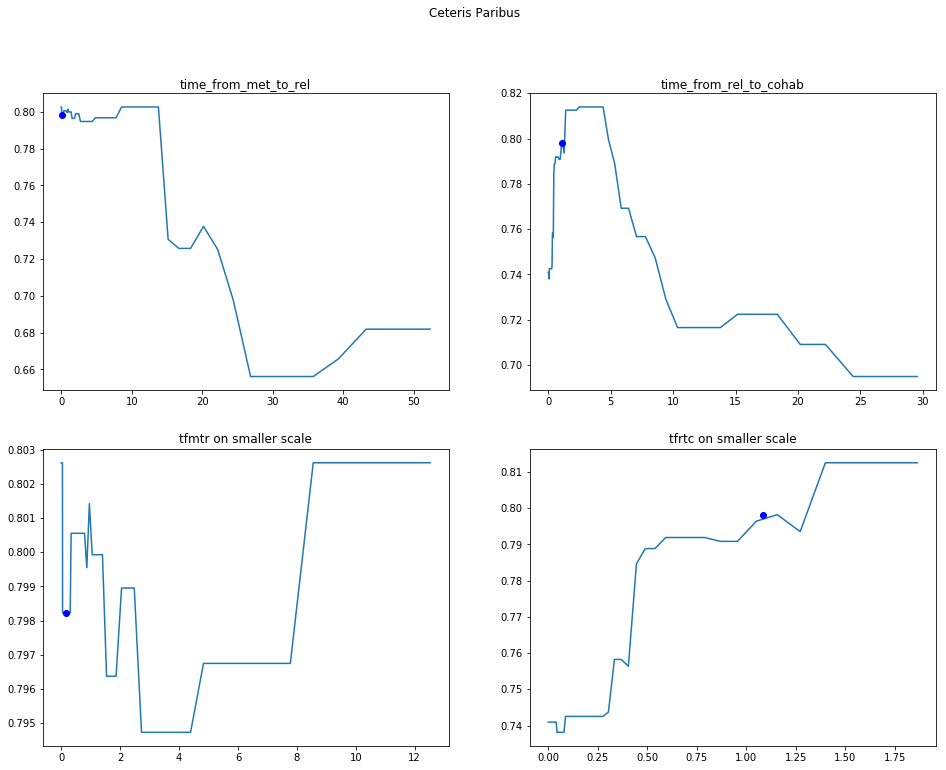

In [28]:
# ceteris paribus dla obu zmiennych ciągłych
changing_observation = np.array([0.166748, 1.083374, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0])  # przykładowa próbka
time_from_met_to_rel = 0.001
var_points_mtr = []
proba_points_mtr = []
# oba paramtery mają bardzo dużo małych wartości w stosunku do maksymalnego przedziału, więc zdecydowałem się na skalę
# logarytmiczną w obu przypadkach 
while time_from_met_to_rel < 55:
    changing_observation[0] = time_from_met_to_rel
    marriage_proba = grid_search_classifier.predict_proba([changing_observation])[0][1]
    var_points_mtr.append(time_from_met_to_rel)
    proba_points_mtr.append(marriage_proba)
    time_from_met_to_rel *= 1.1

changing_observation = np.array([0.166748, 1.083374, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0])
time_from_rel_to_cohab = 0.001
var_points_rtc = []
proba_points_rtc = []
while time_from_rel_to_cohab < 32:
    changing_observation[1] = time_from_rel_to_cohab
    marriage_proba = grid_search_classifier.predict_proba([changing_observation])[0][1]
    var_points_rtc.append(time_from_rel_to_cohab)
    proba_points_rtc.append(marriage_proba)
    time_from_rel_to_cohab *= 1.1

changing_observation = np.array([0.166748, 1.083374, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0])

plt.figure()
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
f.suptitle('Ceteris Paribus')
ax1.plot(var_points_mtr, proba_points_mtr)
ax1.plot(changing_observation[0], grid_search_classifier.predict_proba([changing_observation])[0][1], 'bo')
ax1.set_title("time_from_met_to_rel")
ax3.plot(var_points_mtr[:100], proba_points_mtr[:100])
ax3.plot(changing_observation[0], grid_search_classifier.predict_proba([changing_observation])[0][1], 'bo')
ax3.set_title("tfmtr on smaller scale")
ax2.plot(var_points_rtc, proba_points_rtc)
ax2.plot(changing_observation[1], grid_search_classifier.predict_proba([changing_observation])[0][1], 'bo')
ax2.set_title("time_from_rel_to_cohab")
ax4.plot(var_points_rtc[:80], proba_points_rtc[:80])
ax4.plot(changing_observation[1], grid_search_classifier.predict_proba([changing_observation])[0][1], 'bo')
ax4.set_title("tfrtc on smaller scale")
